

# Digit Recognizer


## 1. Load the data

In [2]:
# Import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.utils import to_categorical


In [44]:
# Load the data

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

## 2. Preprocessing

In [45]:
# Set the target/y and convert to categorical

y = to_categorical(df_train['label'])

In [46]:
# Set features - X, convert to np.array, convert to float, scale

X = df_train.drop(columns = 'label')
X = np.array(X)
X = X.reshape(X.shape[0], 28, 28, 1)
X = X.astype('float32')/255.

X_test = df_test
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')/255.

## 3. Modeling on train dataset

In [47]:
# Train test split df-train

X_train,X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

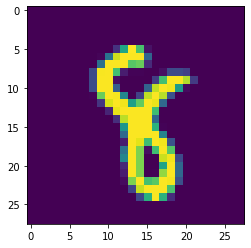

In [36]:
# Look at the numbers

plt.imshow(X_train[1]);

In [48]:
# Create network

cnn = Sequential()

cnn.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

cnn.add(Flatten())   

cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation = 'softmax'))

In [50]:
# Summury of network

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [51]:
# Compile the model

cnn.compile(loss='categorical_crossentropy', 
            optimizer = 'adam', 
            metrics = ['accuracy'])

In [57]:
# Fit the model

history = cnn.fit(X_train, y_train,
                  batch_size=64,
                  validation_data = (X_val, y_val),
                  epochs=72,
                  verbose=1)

Epoch 1/72
493/493 [==============================] - 26s 47ms/step - loss: 0.7139 - accuracy: 0.7659 - val_loss: 0.1409 - val_accuracy: 0.9592
Epoch 2/72
493/493 [==============================] - 24s 48ms/step - loss: 0.2520 - accuracy: 0.9244 - val_loss: 0.0869 - val_accuracy: 0.9728
Epoch 3/72
493/493 [==============================] - 26s 52ms/step - loss: 0.1825 - accuracy: 0.9462 - val_loss: 0.0699 - val_accuracy: 0.9770
Epoch 4/72
493/493 [==============================] - 24s 49ms/step - loss: 0.1499 - accuracy: 0.9555 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 5/72
493/493 [==============================] - 24s 48ms/step - loss: 0.1305 - accuracy: 0.9626 - val_loss: 0.0474 - val_accuracy: 0.9855
Epoch 6/72
493/493 [==============================] - 24s 49ms/step - loss: 0.1181 - accuracy: 0.9657 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 7/72
493/493 [==============================] - 24s 50ms/step - loss: 0.1046 - accuracy: 0.9697 - val_loss: 0.0467 - val_accuracy:

493/493 [==============================] - 25s 51ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0300 - val_accuracy: 0.9928
Epoch 58/72
493/493 [==============================] - 27s 55ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0291 - val_accuracy: 0.9930
Epoch 59/72
493/493 [==============================] - 25s 52ms/step - loss: 0.0371 - accuracy: 0.9894 - val_loss: 0.0289 - val_accuracy: 0.9930
Epoch 60/72
493/493 [==============================] - 25s 51ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0316 - val_accuracy: 0.9916
Epoch 61/72
493/493 [==============================] - 25s 51ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0285 - val_accuracy: 0.9928
Epoch 62/72
493/493 [==============================] - 25s 51ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 63/72
493/493 [==============================] - 25s 50ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0286 - val_accuracy: 0.99

In [58]:
# Last score

cnn.evaluate(X_val,y_val)

329/329 [==============================] - 11s 4ms/step - loss: 0.0230 - accuracy: 0.9933


[0.023038579151034355, 0.9933333396911621]

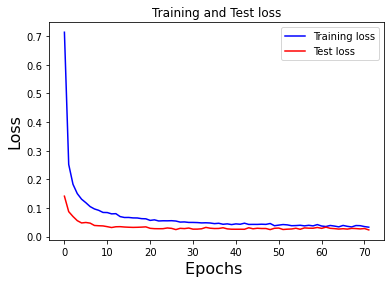

<Figure size 432x288 with 0 Axes>

In [59]:
# Plot the loss score. Loss is a prediction error of Neural Net. 
# And the method to calculate the loss is called the Loss Function. 
# Loss is used to calculate the gradients. And gradients are used to update the weights of the Neural Net.

train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

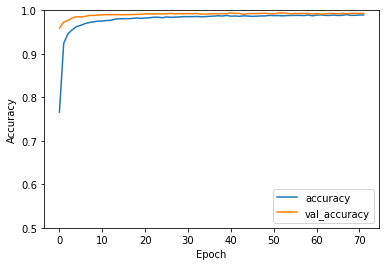

In [60]:
# Plot the accuracy score

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

# test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)

## 4. Predictions and Submissions

In [61]:
# get predictions on test dataset

pred = cnn.predict(X_test)

In [62]:
# Check the predictions shape, needs to be 1 dimens

pred.shape

(28000, 10)

In [63]:
# Look at every score  = 0,1,2,3...9

pred[0]

array([8.30473129e-22, 1.44234449e-19, 1.00000000e+00, 5.83557420e-16,
       1.23175145e-26, 1.16266243e-27, 1.48523758e-26, 5.03825371e-19,
       8.21360504e-17, 3.06821471e-26], dtype=float32)

In [64]:
# sum to get the total

pred[1].sum()

1.0

In [65]:
# returns the max value from given axis

pred.argmax(axis = 1)

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [66]:
# Create label column for test df with argmax values

sample['Label'] = pred.argmax(axis = 1)

In [67]:
sample.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [68]:
#convert to csv and submit to Kaggle

sample.to_csv('./data/submission.csv',index=False)